# Training models

Linear Regression learning:

In [5]:
%matplotlib inline

In [3]:
import numpy as np

X = 2*np.random.rand(100,1)
y = 4 + 3*X + np.random.randn(100,1)

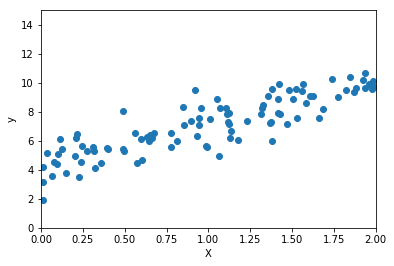

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.xlim((0,2))
plt.ylim((0,15))
plt.show()

In [9]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.23769003],
       [2.90238404]])

In [10]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.23769003],
       [10.04245811]])

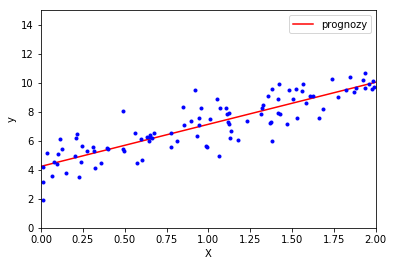

In [13]:
plt.plot(X_new, y_predict, "r-", label= "prognozy")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X, y)
print(reg.intercept_)
print(reg.coef_)
print(reg.predict(X_new))

[4.23769003]
[[2.90238404]]
[[ 4.23769003]
 [10.04245811]]
